## Import particular modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Cleaning and Querying Data

In [2]:
df = pd.read_csv("cityTrend2.csv", 
                 names=["Peninggi badan", "Penggemuk badan", "Obat pelangsing", "Penumbuh rambut", "Pemutih wajah"],
                 header=None,
                 skiprows=3
                )

df = df.reset_index()
df = df.rename(columns={"index":"City"})
df

,City,Peninggi badan,Penggemuk badan,Obat pelangsing,Penumbuh rambut,Pemutih wajah
0,Surabaya,15%,13%,24%,12%,36%
1,Banjarmasin,19%,13%,24%,10%,34%
2,Bekasi,13%,15%,23%,12%,37%
3,Sidoarjo,NaN,NaN,NaN,NaN,NaN
4,Makassar,19%,12%,24%,11%,34%
5,Jakarta,14%,11%,26%,13%,36%
6,Bandung,14%,10%,27%,13%,36%
7,Samarinda,14%,12%,31%,11%,32%
8,Palembang,18%,14%,22%,9%,37%
9,Kediri,NaN,NaN,NaN,NaN,NaN


In [3]:
# Convert the data type to numeric (float/int)
for series in df.columns[1:]:
    df[series] = df[series].str.replace('%', '')
    df[series] = pd.to_numeric(df[series])

In [4]:
# Reset Index
df = df.dropna(axis="rows", how="any")

# Querying the reachable cities
city_trend = df.loc[ 
            (df["City"] == "Yogyakarta") | 
            (df["City"] == "Surabaya")   |
            (df["City"] == "Jakarta")    |
            (df["City"] == "Surakarta")  |
            (df["City"] == "Bandung")    |
            (df["City"] == "Semarang")
          ]

In [5]:
city_trend

,City,Peninggi badan,Penggemuk badan,Obat pelangsing,Penumbuh rambut,Pemutih wajah
0,Surabaya,15.0,13.0,24.0,12.0,36.0
5,Jakarta,14.0,11.0,26.0,13.0,36.0
6,Bandung,14.0,10.0,27.0,13.0,36.0
20,Surakarta,14.0,15.0,25.0,14.0,32.0
24,Yogyakarta,17.0,10.0,29.0,15.0,29.0
25,Semarang,15.0,15.0,26.0,14.0,30.0


## Visualization

In [146]:
data = city_trend.drop(columns="City").to_numpy()
columns = city_trend.columns[1:]
city = city_trend["City"].to_list()

0       Surabaya
5        Jakarta
6        Bandung
20     Surakarta
24    Yogyakarta
25      Semarang
Name: City, dtype: object


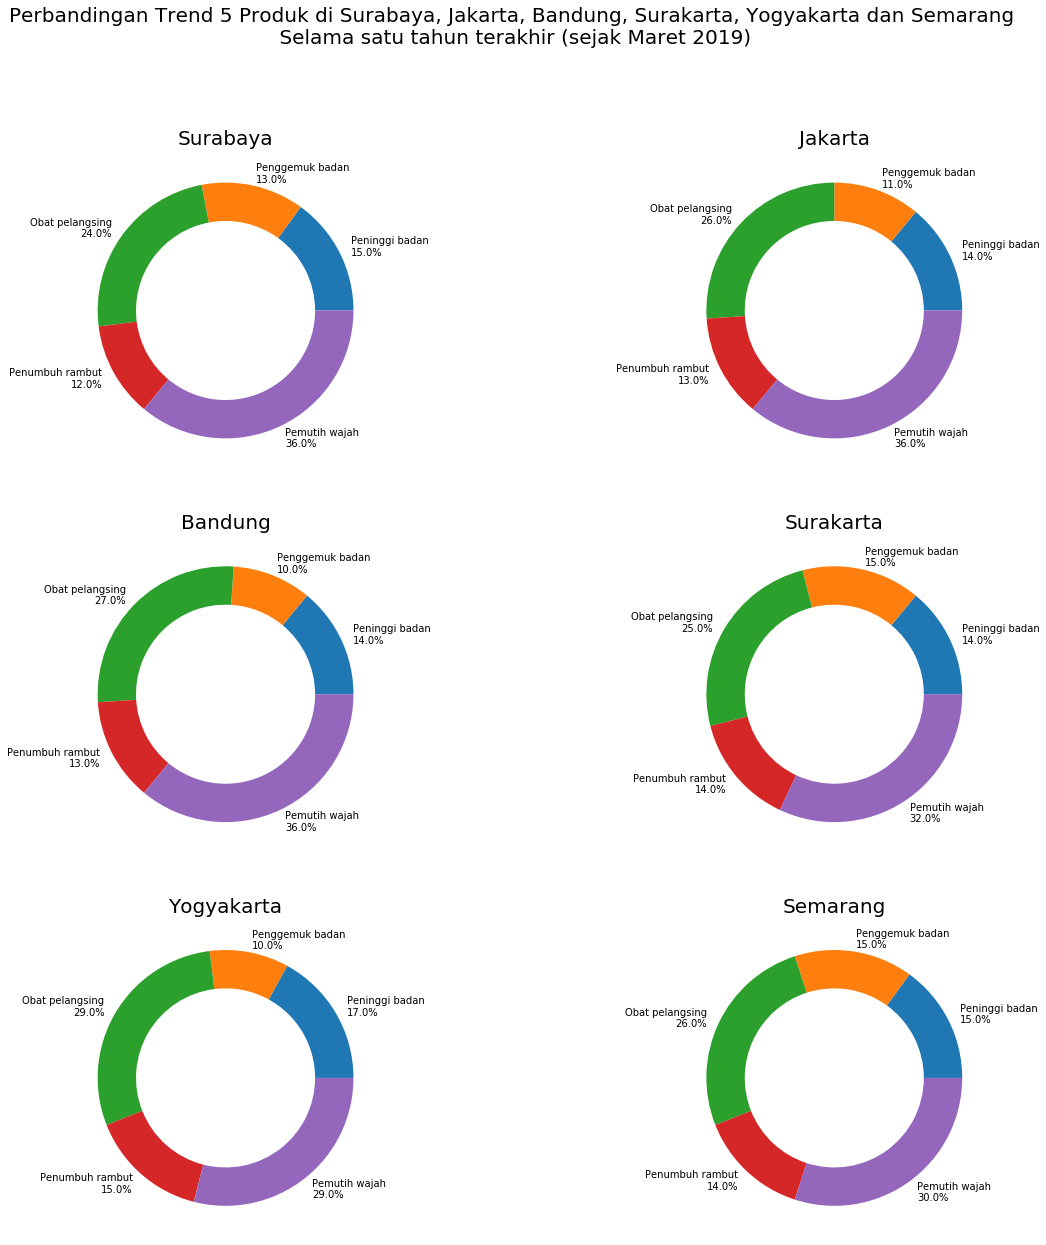

In [158]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))

fig.suptitle("Perbandingan Trend 5 Produk di Surabaya, Jakarta, Bandung, Surakarta, Yogyakarta dan Semarang" +
             "\n Selama satu tahun terakhir (sejak Maret 2019)",
            fontsize=20)
count = 0

textprops = dict(color="k")
fontdict = dict(size=20)
wedgeprops = dict(width=0.3)
labels = [str(x) + "\n" + f"{str(y)}%" for x, y in zip(columns, data[count])]


for i in range(3):
    for j in range(2):
        ax[i, j].pie(data[count], wedgeprops=wedgeprops, 
                     labels=[str(x) + "\n" + f"{str(y)}%" for x, y in zip(columns, data[count])])
        ax[i, j].set_title(city[count], fontdict=fontdict)
        count += 1



In [159]:
fig.savefig("Product_trend.png")